# Wine-Quality dataset
Code example of basic data pre-processing and Machine Learning models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [3]:
os.getcwd()

'/Users/wdfm'

In [4]:
os.chdir("Desktop/")

In [5]:
# Read-in dataset:
data_red = pd.read_csv("winequality-red.csv", sep = ";")

In [6]:
# Get dimensionality of dataset:
data_red.shape

(1599, 12)

In [7]:
# Get column names:
data_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# Check for missing values:
data_red.isna().values.any()

False

In [9]:
data_red.isna().sum().sum()

0

In [10]:
# Get data statistics:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# Compute skewness for numeric columns:
for col in data_red.columns:
    print(f"{col} has {data_red[col].skew():.3f} skewness")

fixed acidity has 0.983 skewness
volatile acidity has 0.672 skewness
citric acid has 0.318 skewness
residual sugar has 4.541 skewness
chlorides has 5.680 skewness
free sulfur dioxide has 1.251 skewness
total sulfur dioxide has 1.516 skewness
density has 0.071 skewness
pH has 0.194 skewness
sulphates has 2.429 skewness
alcohol has 0.861 skewness
quality has 0.218 skewness


In [12]:
# Compute bin size using rule of thumb:
num_bins = int(np.ceil(np.sqrt(len(data_red))))

print(f"number of bins using rule of thumb = {num_bins}")

number of bins using rule of thumb = 40


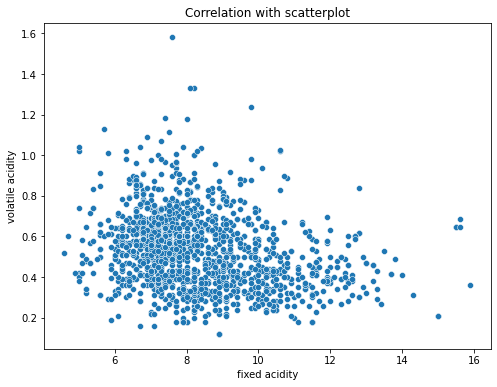

In [13]:
# Visualize correlation between 2 columns:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = data_red['fixed acidity'], y = data_red['volatile acidity'])
plt.title("Correlation with scatterplot")
plt.show()

# NOTE: It appears to have a negative trend/correlation!

### Visualize distribution of numeric columns:

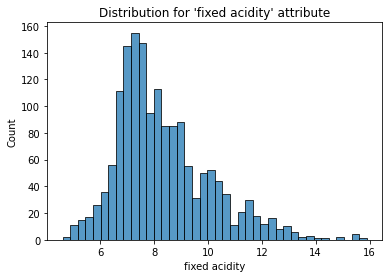

In [14]:
sns.histplot(data = data_red['fixed acidity'], bins = num_bins)
plt.title("Distribution for 'fixed acidity' attribute")
plt.show()

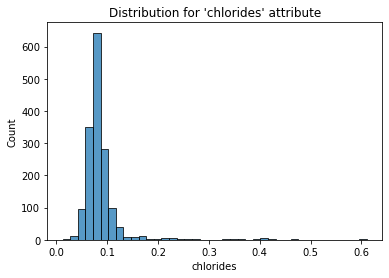

In [15]:
sns.histplot(data = data_red['chlorides'], bins = num_bins)
plt.title("Distribution for 'chlorides' attribute")
plt.show()

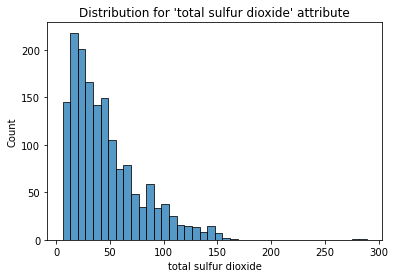

In [16]:
sns.histplot(data = data_red['total sulfur dioxide'], bins = num_bins)
plt.title("Distribution for 'total sulfur dioxide' attribute")
plt.show()

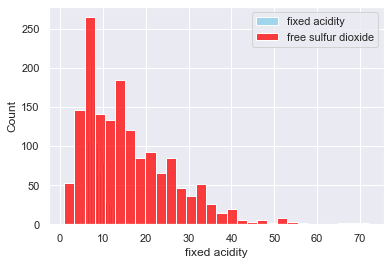

In [17]:
# Set a grey background:
sns.set(style = 'darkgrid')

sns.histplot(data = data_red['fixed acidity'], color = 'skyblue', label = 'fixed acidity', kde = False)
sns.histplot(data = data_red['free sulfur dioxide'], color = 'red', label = 'free sulfur dioxide', kde = False)
plt.legend(loc = 'best')
plt.show()

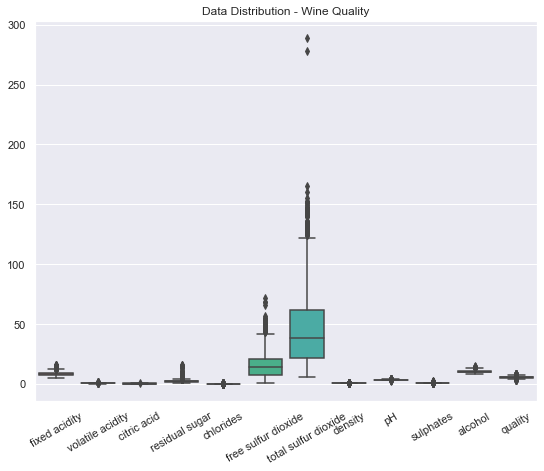

In [18]:
plt.figure(figsize = (9, 7))
sns.boxplot(data = data_red)
plt.xticks(rotation = 30)
plt.title("Data Distribution - Wine Quality")
plt.show() 

In [19]:
# Distribution of target column:
data_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

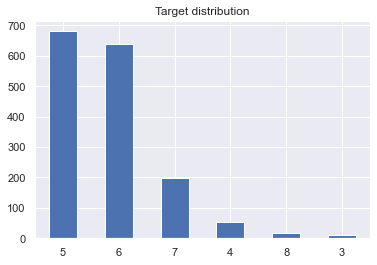

In [20]:
data_red['quality'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title("Target distribution")
plt.show()

In [21]:
# Split dataset into features (X) and target (y):
X = data_red.drop('quality', axis = 1, inplace = False)
y = data_red['quality']

In [22]:
# Scale data for ML models:
std_scaler = StandardScaler()
data_red_scaled = std_scaler.fit_transform(X)

In [23]:
X_scaled = pd.DataFrame(data_red_scaled, columns = X.columns)

In [24]:
# Get training and validation sets:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

In [25]:
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X_train.shape: (1119, 11), y_train.shape: (1119,)
X_test.shape: (480, 11), y_test.shape: (480,)


In [26]:
# Decision Tree classifier:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Make predictions using trained model:
y_pred = dt_clf.predict(X_test)

In [28]:
# Get model metrics:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average = 'macro')
rec = recall_score(y_test, y_pred, average = 'macro')

In [29]:
print("Decision Tree classifier (base) metrics on validation dataset are:")
print(f"accuracy = {acc * 100:.2f}%, precision = {prec * 100:.2f}% & "
      f"recall = {rec * 100:.2f}%"
     )

Decision Tree classifier (base) metrics on validation dataset are:
accuracy = 56.46%, precision = 29.22% & recall = 29.99%


In [30]:
print(f"Confusion matrix (Decision Tree base):\n\n"
      f"{confusion_matrix(y_test, y_pred)}")

Confusion matrix (Decision Tree base):

[[  0   0   3   0   0   0]
 [  0   1   5   6   0   0]
 [  0  11 136  57  12   0]
 [  1   4  44  99  26   4]
 [  0   0   2  28  35   1]
 [  0   0   1   1   3   0]]


In [31]:
# Use RandomForest classifier:
rf_clf = RandomForestClassifier(n_estimators = 250)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [32]:
# Make predictions using trained model:
y_pred_rf = rf_clf.predict(X_test)

In [33]:
# Get model metrics:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average = 'macro')
rec_rf = recall_score(y_test, y_pred_rf, average = 'macro')

In [34]:
print("RandomForest Tree classifier (trees = 250) metrics on validation dataset are:")
print(f"accuracy = {acc_rf * 100:.2f}%, precision = {prec_rf * 100:.2f}% & "
      f"recall = {rec_rf * 100:.2f}%"
     )

RandomForest Tree classifier (trees = 250) metrics on validation dataset are:
accuracy = 69.38%, precision = 36.19% & recall = 33.55%


In [35]:
print(f"Confusion matrix (RandomForest; 250 trees):\n\n"
      f"{confusion_matrix(y_test, y_pred_rf)}")

Confusion matrix (RandomForest; 250 trees):

[[  0   0   2   1   0   0]
 [  0   0   8   3   1   0]
 [  2   2 165  46   1   0]
 [  0   0  36 136   6   0]
 [  0   0   1  32  32   1]
 [  0   0   0   4   1   0]]
